Задание № 0
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

желаемая точность 
Δ= 3;
дисперсия 
σ2= 225;
уровень доверия 
β= 0.95.

In [43]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
sigma = 15  
Z = 1.96 
d = 3 
N = ((sigma*Z)/d)**2
print(N)

96.03999999999998



Задание № 1
Постройте 98% доверительный интервал для среднего значения, если известно, что
объем выборки n = 25;
среднее значение по выборке 
x = 130;
Из достоверных источников известно стандартное отклонение 
σ=12


In [73]:
import scipy.stats as st
import numpy as np
import math
b=0.98
n = 25
X = 130
se = 12
#
t_a=2.49
h = se/math.sqrt(n)*t_a
print(X-h, X, X+h)


124.024 130 135.976



Задание № 2
Даны две выборки роста мужчин и женщин.

Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен 
α = 0.001.
Покажите различия визуально

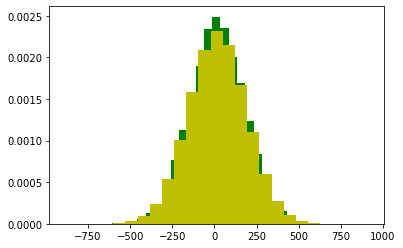

Ttest_indResult(statistic=1.0763195956603429, pvalue=0.28180593590296626)

In [68]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

plt.hist(population_women, bins=25, density = True, color='g')
plt.hist(population_men, bins=25, density = True, color='y')
plt.show()
stats.ttest_ind(population_men, population_women, equal_var = False)
#p-value  значительно больше а. Гипотизу о различие средних двух выборок отвергнуть не можем. 
#График так же показывает что  разница между выборками незначительна


Задание № 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

стандартное отклонение 
σ=150
уровень доверия 
β = 95%;
Погрешность 
Δ=50 рублей.

In [70]:
b=0.95
se = 150  
Z = 1.96 
d = 50 
N = ((se*Z)/d)**2
print(N)

34.5744


Задание № 4
Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 (α=0.05).

In [74]:
a=0.05
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
print(observations)
oddsratio, pvalue = stats.fisher_exact(observations)
oddsratio, pvalue
# Не можем отвергнуть нулевую гепотизу о том что нет различий между  ответом волшебника и реальностью. 
#Похоже маг таки умеет предсказывать

        Ответ волшебника  Реальность
Дождь                 10          15
Солнце                39          34


(0.5811965811965812, 0.35417955365927367)


Задание № 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 
β=90%
 для выборки

In [76]:
def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
d1,m,d2 = mean_confidence_interval(data,0.90)
print(d1,m,d2)

6.074074746111319 6.628571428571429 7.183068111031539


Задание № 6
Принадлежат ли выборки data_1 и data_2 одному множеству?

Оцените это с помощью известных вам тестов для проверок статистических гипотез;
Покажите различия визуально.

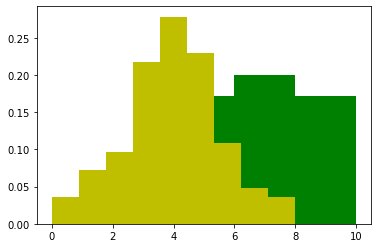

7.35744682757447 2.1159475572725764e-11


In [85]:

data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

plt.hist(data_1, bins=10, density = True, color='g')
plt.hist(data_2, bins=9, density = True, color='y')
plt.show()
t, p = stats.ttest_ind(data_1, data_2)
print(t,p)
#Возьмом а=1%. p-Value меньше уровня значимости, отвергаем Н0. С 99% вероятностью эти выборки пренадлежат разным множествам
#так же это видно на визуализации

In [ ]:

Задание № 7 (задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет
не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. 
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

In [ ]:
#При уровне значимости 0.05 буду считать что распределение не нормальное


Задание № 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

При каком минимальном p-value различия были бы уже значимы?

Если выборки незначительно отличаются, то продемонстрируйте это визуально

1.8847229265385363 0.05995260332765237


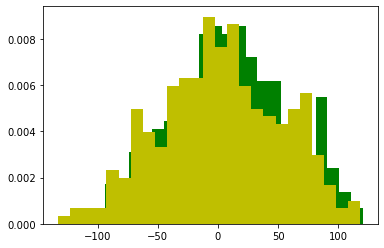

In [92]:

np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)
t, p = stats.ttest_ind(A, B, equal_var=False)
print(t,p)
# различия не значимы, не можем отклонить H0 так как 0.05 < 0.06 

plt.hist(A, bins=25, density = True, color='g')
plt.hist(B, bins=25, density = True, color='y')
plt.show()